In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pickle

# Carga del dataset procesado

In [34]:
df = pd.read_csv("../data/processed/arbol_diabetes.csv")

# SPLIT

In [35]:
X = df.drop(columns = ["Outcome"])
y = df["Outcome"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construcción del Random Forest

Modelo base

In [36]:
rf_base = RandomForestClassifier(n_estimators=100, random_state=42)

rf_base.fit(X_train, y_train)

y_pred_base = rf_base.predict(X_test)
accuracy_base = accuracy_score(y_test, y_pred_base)

accuracy_base

0.7467532467532467

Se analizan los dos hiperparámetros clave indicados:

n_estimators → cantidad de árboles

max_depth → complejidad de cada árbol

In [37]:
n_estimators_list = [10, 50, 100, 200]
max_depth_list = [3, 5, 7, None]

results = []

for n in n_estimators_list:
    for depth in max_depth_list:
        model = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        results.append((n, depth, acc))
results
        

[(10, 3, 0.7922077922077922),
 (10, 5, 0.7337662337662337),
 (10, 7, 0.7402597402597403),
 (10, None, 0.7532467532467533),
 (50, 3, 0.7857142857142857),
 (50, 5, 0.7532467532467533),
 (50, 7, 0.7467532467532467),
 (50, None, 0.7532467532467533),
 (100, 3, 0.7792207792207793),
 (100, 5, 0.7532467532467533),
 (100, 7, 0.7597402597402597),
 (100, None, 0.7467532467532467),
 (200, 3, 0.7857142857142857),
 (200, 5, 0.7532467532467533),
 (200, 7, 0.7532467532467533),
 (200, None, 0.7532467532467533)]

Visualización

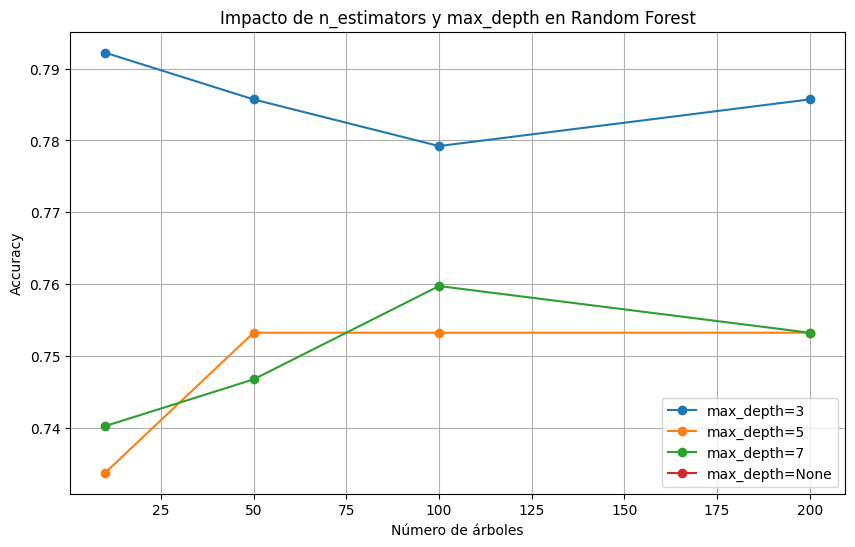

In [38]:
results_df = pd.DataFrame(
    results,
    columns=["n_estimators", "max_depth", "accuracy"]
)

plt.figure(figsize=(10, 6))

for depth in max_depth_list:
    subset = results_df[results_df["max_depth"] == depth]
    plt.plot(
        subset["n_estimators"],
        subset["accuracy"],
        marker="o",
        label=f"max_depth={depth}"
    )

plt.xlabel("Número de árboles")
plt.ylabel("Accuracy")
plt.title("Impacto de n_estimators y max_depth en Random Forest")
plt.legend()
plt.grid(True)
plt.show()

Selección del mejor modelo

In [39]:
best_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

best_model.fit(X_train, y_train)

y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

accuracy_train, accuracy_test

(0.8534201954397395, 0.7532467532467533)

Visualización de árboles del Random Forest

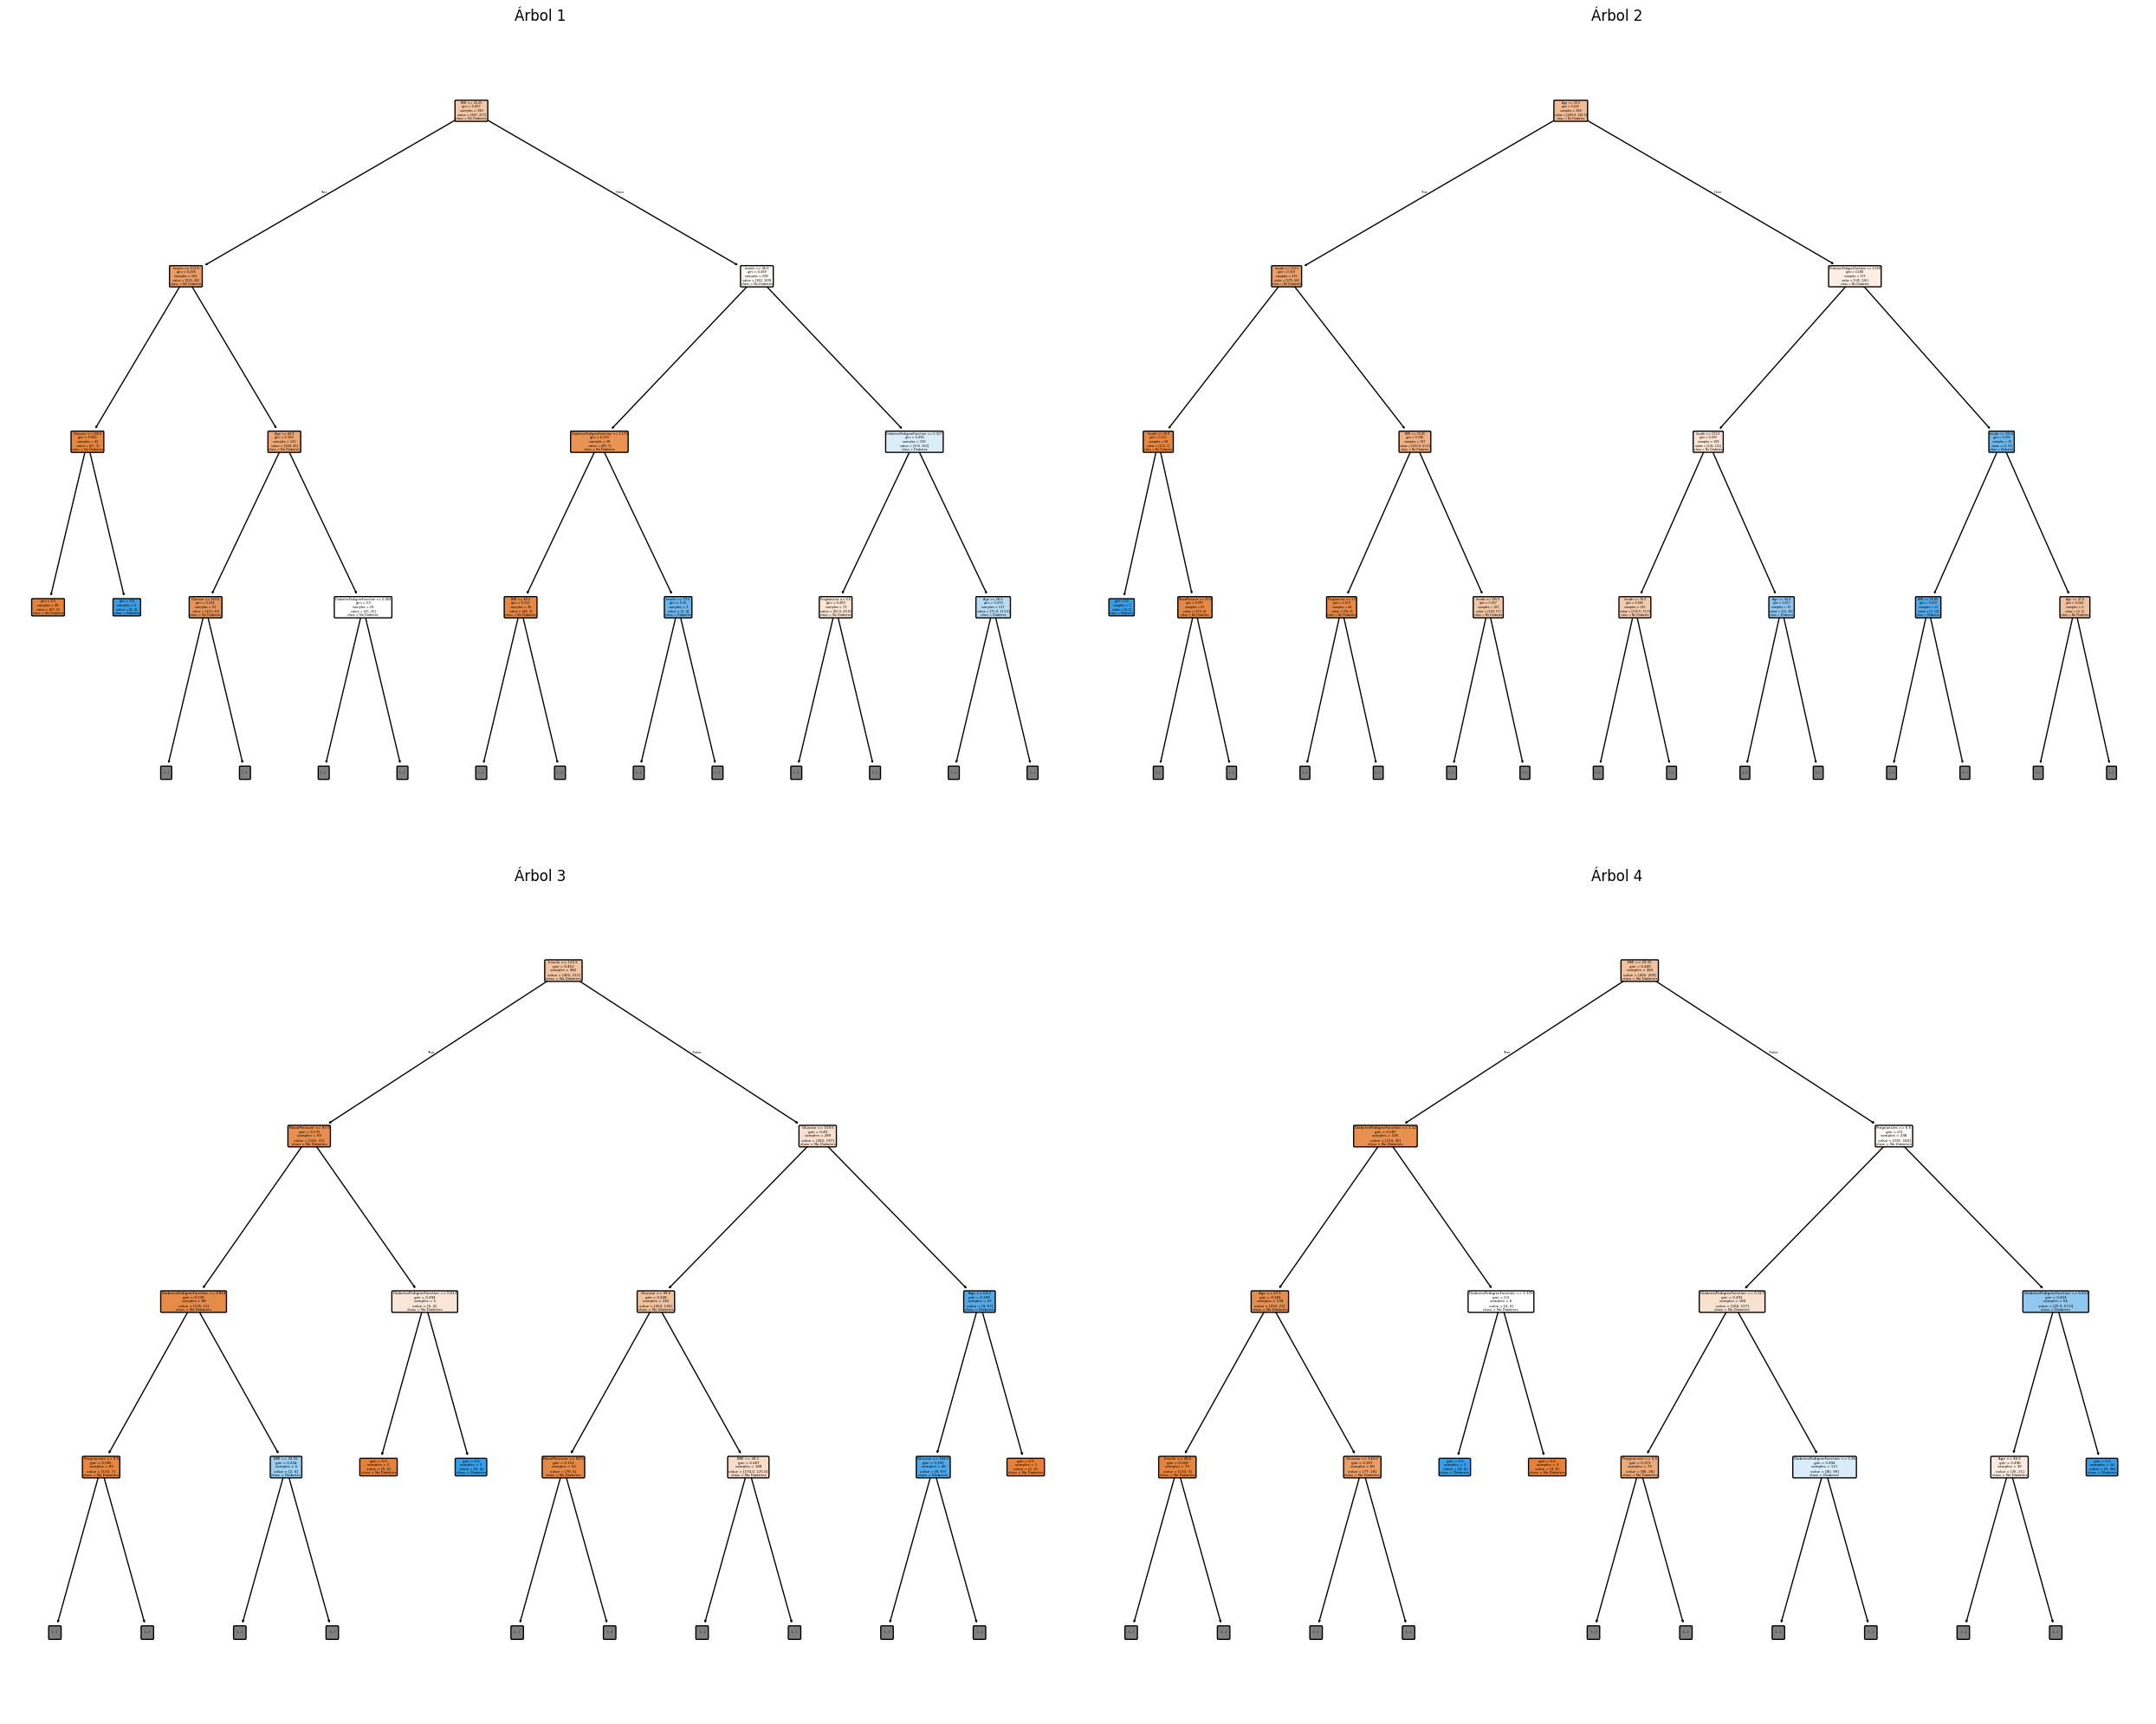

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(25, 20))

for i, ax in enumerate(axes.flatten()):
    tree.plot_tree(best_model.estimators_[i],
                   feature_names=X.columns,
                   class_names=["No Diabetes", "Diabetes"],
                   filled=True,
                   rounded=True,
                   max_depth=3,
                   ax=ax)
    ax.set_title(f"Árbol {i+1}")

plt.tight_layout()
plt.show()

In [41]:
with open("../models/diabetes_random_forest.pkl", "wb") as file:
    pickle.dump(best_model, file)